In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.decomposition import PCA

In [23]:
df = pd.read_csv('CC GENERAL.csv', sep=",", encoding="ISO-8859-1", header=0)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Data Cleaning

In [24]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [25]:
# impute with median
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].median()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].median()

In [26]:
# drop ID column
df = df.drop('CUST_ID', 1)

# normalize values
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled.shape

(8950, 17)

In [27]:
df_imputed = pd.DataFrame(df_scaled, columns=df.columns)

# Clustering

In [28]:
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

#### 3. Plot the clusters

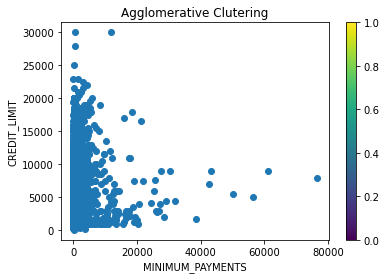

In [29]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df ['MINIMUM_PAYMENTS'] , df ['CREDIT_LIMIT'] )
ax.set_title('Agglomerative Clutering')
ax.set_xlabel('MINIMUM_PAYMENTS')
ax.set_ylabel('CREDIT_LIMIT')
plt.colorbar(scatter)

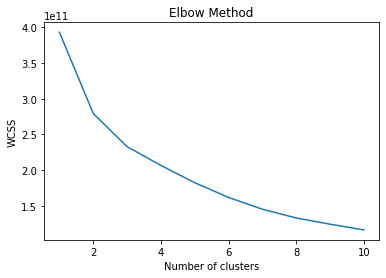

In [30]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)

#### 4. Plot the dendrogram. Use k-means clustering. 

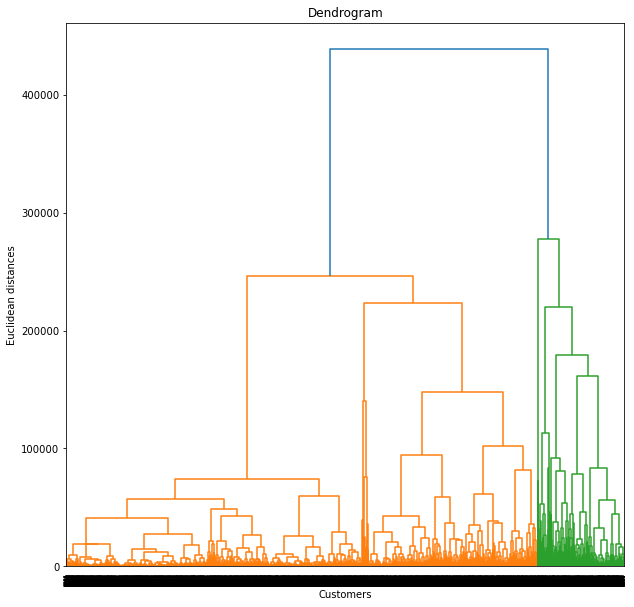

In [32]:
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

#### 5. Try different k values and select the best one.

In [33]:
kmeans = KMeans(n_clusters = 15, init = 'k-means++', random_state = 40)
y_kmeans = kmeans.fit_predict(df)

#### 6. Plot the new clusters. 

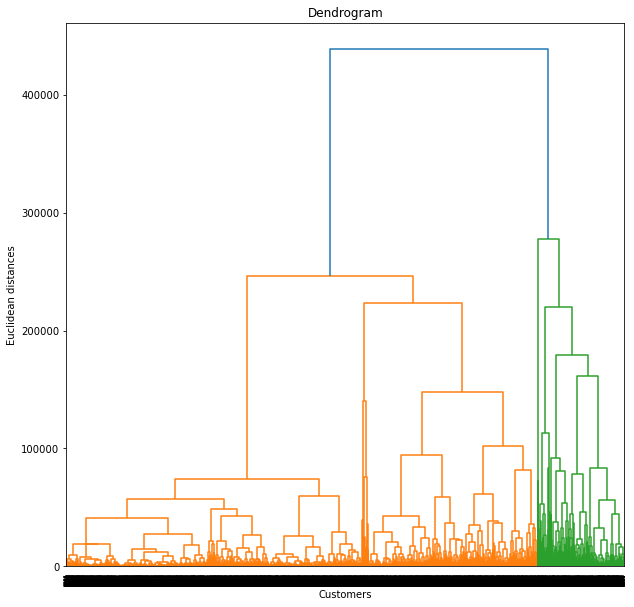

In [34]:
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

#### 7. Compare the two results

#### Bonus: search for another validation metric

#### Clustering Metrics

In [ ]:
#apply PCA and display clustering metrics
for y in range(2, 5):
    print("PCA with # of components: ", y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(df_imputed)
    for x in range(2, 7):
        alg = KMeans(n_clusters = x, )
        label = alg.fit_predict(df_p)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(df_p, label) , '       Inertia: ',alg.inertia_)
    print()

Text(0, 0.5, 'PC2')

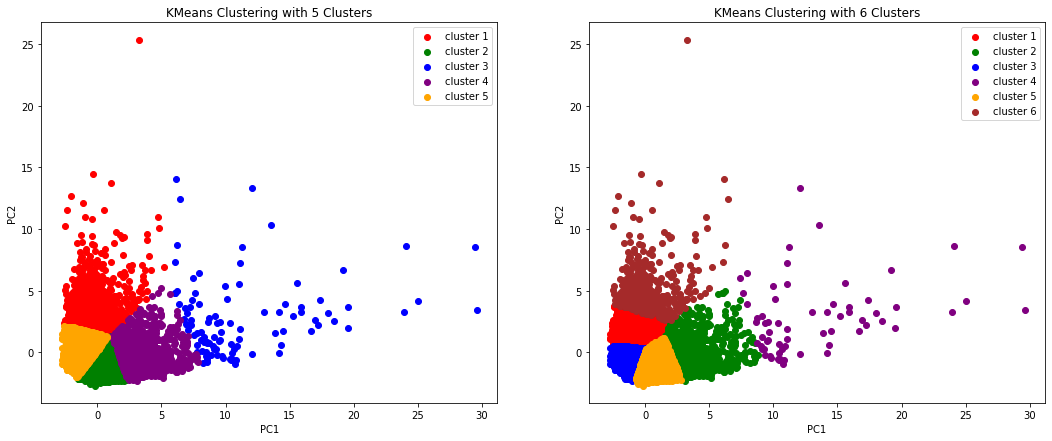

In [36]:
df_p = pd.DataFrame(PCA(n_components = 2).fit_transform(df_imputed))
preds = pd.Series(KMeans(n_clusters = 5,).fit_predict(df_p))
df_p = pd.concat([df_p, preds], axis =1)
df_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(df_p[df_p['target']==0].iloc[:,0], df_p[df_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(df_p[df_p['target']==1].iloc[:,0], df_p[df_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(df_p[df_p['target']==2].iloc[:,0], df_p[df_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(df_p[df_p['target']==3].iloc[:,0], df_p[df_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(df_p[df_p['target']==4].iloc[:,0], df_p[df_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('KMeans Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


df_p = pd.DataFrame(PCA(n_components = 2).fit_transform(df_imputed))
preds = pd.Series(KMeans(n_clusters = 6,).fit_predict(df_p))
df_p = pd.concat([df_p, preds], axis =1)
df_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(df_p[df_p['target']==0].iloc[:,0], df_p[df_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(df_p[df_p['target']==1].iloc[:,0], df_p[df_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(df_p[df_p['target']==2].iloc[:,0], df_p[df_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(df_p[df_p['target']==3].iloc[:,0], df_p[df_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(df_p[df_p['target']==4].iloc[:,0], df_p[df_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(df_p[df_p['target']==5].iloc[:,0], df_p[df_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend()
plt.title('KMeans Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

So far, by applying PCA we have made notable improvement to KMeans model. Let's try other clustering models as well!